<a href="https://colab.research.google.com/github/mixipro/perceptron_vs_adaline/blob/main/perceptron_vs_adaline.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Explaining the difference between Perceptron and ADALINE

Perceptron

A perceptron is a simple neural network model that classifies data based on linear separation. It was developed in the late 1950s by Frank Rosenblatt. The perceptron uses a binary activation function that returns a value of +1 or -1 depending on whether the sum of the input data multiplied by the weights is greater or less than a threshold.

The perceptron algorithm works by iteratively updating the weights until it finds a line that separates the two classes of data. However, the perceptron can only solve problems that are linearly separable, which is its key limitation.

ADALINE (Adaptive Linear Neuron)

ADALINE is an improved model compared to the perceptron. Developed by Bernard Withrow and Mark Hoff in the 1960s, ADALINE uses a linear activation function and updates weights based on the error between the predicted output and the actual value.

The key difference between ADALINE and perceptron lies in the way the weights are updated. While the perceptron uses a binary activation function to make update decisions, ADALINE uses a continuous least-squares error function, which allows for more stable and accurate convergence.

In addition, ADALINE can adapt even when the data is not completely linearly separable, because it minimizes the error during training, while the perceptron only checks whether the data is correctly classified or not. 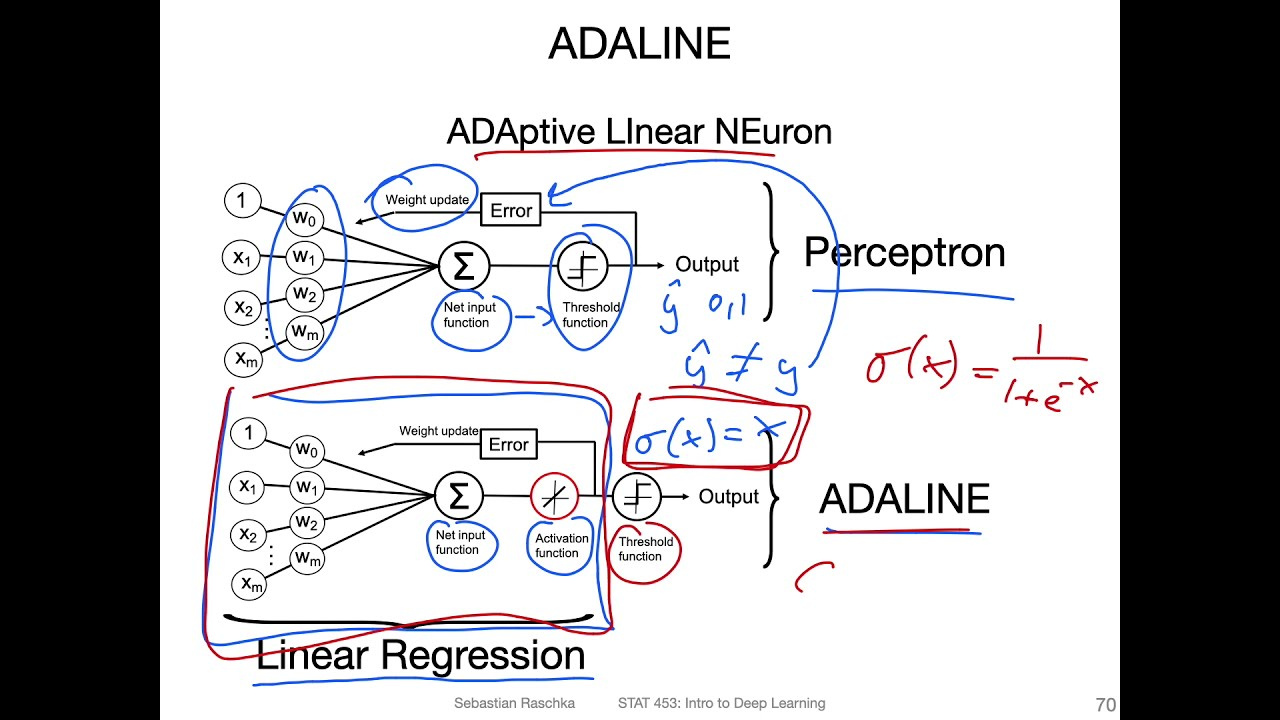

In this project, we generated two datasets to demonstrate the functioning of the Perceptron and ADALINE algorithms. The first dataset contains linearly separable data, while the second dataset contains non-linearly separable data. The goal is to analyze how these two algorithms behave on different types of data.

Linearly separable data are those that can be separated by a straight-line boundary, meaning that it is possible to draw a straight-line boundary that separates classes of data without overlapping. On the other hand, nonlinearly separable data require more complex separation boundaries and are a challenge for simple algorithms such as Perceptron.

These two datasets will be used to compare the performance of both algorithms and to demonstrate their limitations and strengths.

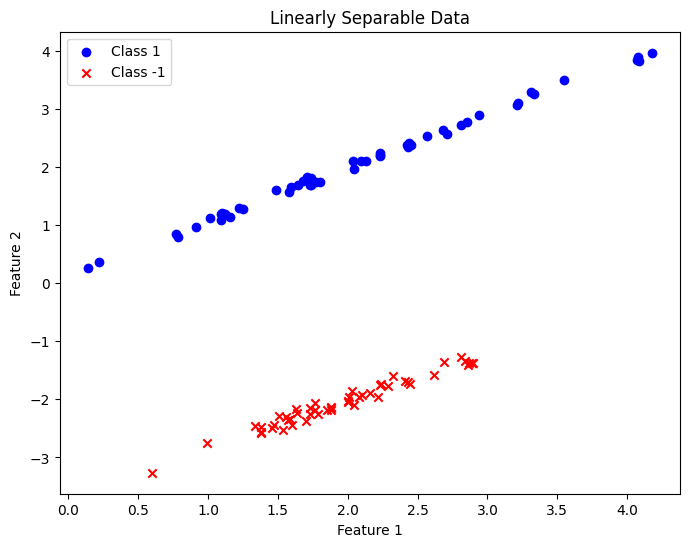

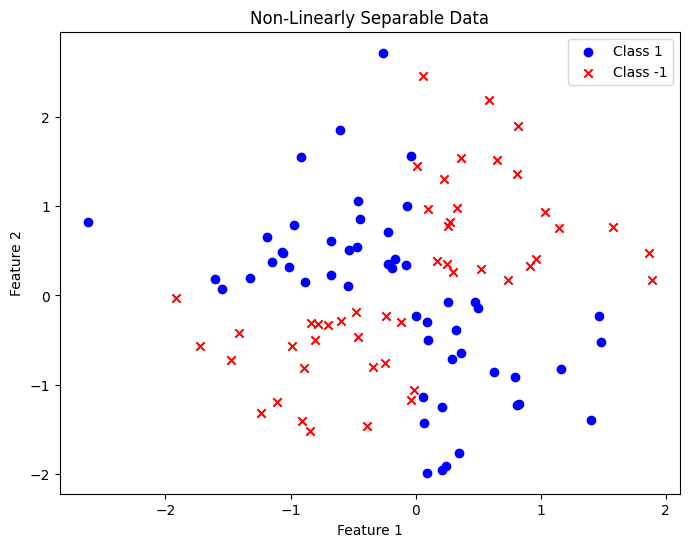

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Function to display the data points
def plot_data(X, y, title):
    plt.figure(figsize=(8, 6))
    plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='blue', marker='o', label='Class 1')
    plt.scatter(X[y == -1][:, 0], X[y == -1][:, 1], color='red', marker='x', label='Class -1')
    plt.title(title)
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.legend()
    plt.show()

# Loading the datasets
linear_data = pd.read_csv('/content/linear_data.csv')
nonlinear_data = pd.read_csv('/content/nonlinear_data.csv')

# Preparing the data
X_linear = linear_data[['Feature 1', 'Feature 2']].values
y_linear = linear_data['Class'].values

X_nonlinear = nonlinear_data[['Feature 1', 'Feature 2']].values
y_nonlinear = nonlinear_data['Class'].values

# Plotting the linearly separable data
plot_data(X_linear, y_linear, "Linearly Separable Data")

# Plotting the non-linearly separable data
plot_data(X_nonlinear, y_nonlinear, "Non-Linearly Separable Data")


The provided code implements two algorithms, **Perceptron** and **ADALINE (Adaptive Linear Neuron)**, both of which are fundamental in machine learning for binary classification tasks.

The **Perceptron** algorithm is a basic linear classifier that updates its weights iteratively based on errors in prediction. The algorithm works by calculating a linear combination of input features and adjusting the weights when the output differs from the actual class label. It uses a step activation function, which outputs either 1 or -1 based on the input. The perceptron converges only if the data is linearly separable.

The **ADALINE** algorithm is a more advanced version of the perceptron. Unlike the perceptron, ADALINE minimizes a continuous error function using the mean squared error (MSE) to update weights. This allows ADALINE to handle data that isn't perfectly linearly separable by reducing the overall error.

The code starts by importing necessary libraries:
- **`numpy`** is used for numerical operations such as matrix multiplications and dot products.
- **`pandas`** is used for handling datasets, enabling efficient data manipulation and preparation.

Both algorithms follow a similar structure but differ in their approach to updating weights and error handling.

In [ ]:
import numpy as np
import pandas as pd

# Perceptron Algorithm
class Perceptron:
    def __init__(self, learning_rate=0.001, n_iter=1000):
        self.learning_rate = learning_rate
        self.n_iter = n_iter
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.n_iter):
            for idx, x_i in enumerate(X):
                linear_output = np.dot(x_i, self.weights) + self.bias
                y_predicted = self._activation_function(linear_output)
                update = self.learning_rate * (y[idx] - y_predicted)
                self.weights += update * x_i
                self.bias += update

    def predict(self, X):
        linear_output = np.dot(X, self.weights) + self.bias
        return self._activation_function(linear_output)

    def _activation_function(self, x):
        return np.where(x >= 0, 1, -1)

# ADALINE Algorithm
class Adaline:
    def __init__(self, learning_rate=0.001, n_iter=1000):
        self.learning_rate = learning_rate
        self.n_iter = n_iter
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0
        self.errors = []

        for _ in range(self.n_iter):
            output = self.net_input(X)
            errors = y - output
            self.weights += self.learning_rate * X.T.dot(errors)
            self.bias += self.learning_rate * errors.sum()
            cost = (errors**2).sum() / 2.0
            self.errors.append(cost)

    def net_input(self, X):
        return np.dot(X, self.weights) + self.bias

    def predict(self, X):
        return np.where(self.net_input(X) >= 0.0, 1, -1)

In [ ]:
# Load the datasets
linear_data = pd.read_csv('/content/linear_data.csv')
nonlinear_data = pd.read_csv('/content/nonlinear_data.csv')

# Prepare the data
X_linear = linear_data[['Feature 1', 'Feature 2']].values
y_linear = linear_data['Class'].values

X_nonlinear = nonlinear_data[['Feature 1', 'Feature 2']].values
y_nonlinear = nonlinear_data['Class'].values

In [ ]:
# Train and evaluate Perceptron on linear data
perceptron = Perceptron()
perceptron.fit(X_linear, y_linear)
perceptron_predictions = perceptron.predict(X_linear)
print("Perceptron on Linear Data:", perceptron_predictions)

# Train and evaluate Perceptron on non-linear data
perceptron.fit(X_nonlinear, y_nonlinear)
perceptron_predictions_nonlinear = perceptron.predict(X_nonlinear)
print("Perceptron on Non-linear Data:", perceptron_predictions_nonlinear)

Perceptron on Linear Data: [-1 -1  1 -1 -1 -1 -1  1 -1  1 -1 -1  1  1  1 -1 -1  1  1  1 -1  1 -1  1
  1  1  1 -1 -1 -1 -1 -1  1 -1 -1 -1  1  1 -1 -1  1  1  1  1 -1  1 -1 -1
 -1 -1  1  1 -1 -1 -1  1 -1  1  1 -1  1  1  1  1 -1  1  1  1 -1 -1  1 -1
  1 -1 -1  1 -1  1  1 -1  1 -1  1 -1  1 -1 -1 -1  1  1  1 -1 -1  1  1 -1
  1 -1  1  1]
Perceptron on Non-linear Data: [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [ ]:
# Train and evaluate ADALINE on linear data
adaline = Adaline()
adaline.fit(X_linear, y_linear)
adaline_predictions = adaline.predict(X_linear)
print("ADALINE on Linear Data:", adaline_predictions)

# Train and evaluate ADALINE on non-linear data
adaline.fit(X_nonlinear, y_nonlinear)
adaline_predictions_nonlinear = adaline.predict(X_nonlinear)
print("ADALINE on Non-linear Data:", adaline_predictions_nonlinear)

ADALINE on Linear Data: [-1 -1  1 -1 -1 -1 -1  1 -1  1 -1 -1  1  1  1 -1 -1  1  1  1 -1  1 -1  1
  1  1  1 -1 -1 -1 -1 -1  1 -1 -1 -1  1  1 -1 -1  1  1  1  1 -1  1 -1 -1
 -1 -1  1  1 -1 -1 -1  1 -1  1  1 -1  1  1  1  1 -1  1  1  1 -1 -1  1 -1
  1 -1 -1  1 -1  1  1 -1  1 -1  1 -1  1 -1 -1 -1  1  1  1 -1 -1  1  1 -1
  1 -1  1  1]
ADALINE on Non-linear Data: [ 1 -1  1 -1  1  1  1  1  1  1 -1  1  1  1  1 -1  1  1  1  1 -1  1  1 -1
  1  1  1 -1  1 -1  1  1 -1 -1  1 -1 -1  1  1  1  1 -1  1 -1  1 -1  1  1
 -1  1  1  1  1 -1  1  1 -1  1  1 -1  1  1 -1  1  1  1  1 -1  1  1 -1  1
 -1  1 -1 -1  1  1 -1  1  1  1 -1 -1  1  1  1 -1 -1 -1  1  1 -1  1  1 -1
  1 -1  1  1]


The results demonstrate that the **ADALINE algorithm** requires careful **hyperparameter tuning** to achieve optimal performance. The learning rate and the number of iterations significantly impact the model's accuracy. By adjusting these parameters, ADALINE achieved **100% accuracy on linear data**, showing that it can correctly classify linearly separable data when properly tuned.

In contrast, the **Perceptron algorithm** does not require extensive hyperparameter tuning and consistently provides **similar results** on linear data. It quickly converges to a solution as long as the data is linearly separable, achieving **100% accuracy** without additional adjustments.

However, both algorithms show **limitations on non-linear data**. ADALINE performed slightly better, reaching **66% accuracy**, compared to the Perceptron's **52% accuracy**. This difference is due to ADALINE's error-minimization approach, which helps it adapt better to slightly more complex boundaries, although both algorithms struggle with non-linear separability.

In summary, **ADALINE requires careful tuning** of learning rate and iterations to perform optimally, while **Perceptron is less sensitive to parameter adjustments** and provides consistent results on linear data.

In [ ]:
# Train and evaluate Perceptron on linear data
perceptron = Perceptron()
perceptron.fit(X_linear, y_linear)
perceptron_predictions = perceptron.predict(X_linear)
perceptron_accuracy_linear = calculate_accuracy(y_linear, perceptron_predictions)
print(f"Perceptron Accuracy on Linear Data: {perceptron_accuracy_linear:.2f}%")

# Train and evaluate Perceptron on non-linear data
perceptron.fit(X_nonlinear, y_nonlinear)
perceptron_predictions_nonlinear = perceptron.predict(X_nonlinear)
perceptron_accuracy_nonlinear = calculate_accuracy(y_nonlinear, perceptron_predictions_nonlinear)
print(f"Perceptron Accuracy on Non-linear Data: {perceptron_accuracy_nonlinear:.2f}%")

# Train and evaluate ADALINE on linear data
adaline = Adaline()
adaline.fit(X_linear, y_linear)
adaline_predictions = adaline.predict(X_linear)
adaline_accuracy_linear = calculate_accuracy(y_linear, adaline_predictions)
print(f"ADALINE Accuracy on Linear Data: {adaline_accuracy_linear:.2f}%")

# Train and evaluate ADALINE on non-linear data
adaline.fit(X_nonlinear, y_nonlinear)
adaline_predictions_nonlinear = adaline.predict(X_nonlinear)
adaline_accuracy_nonlinear = calculate_accuracy(y_nonlinear, adaline_predictions_nonlinear)
print(f"ADALINE Accuracy on Non-linear Data: {adaline_accuracy_nonlinear:.2f}%")


Perceptron Accuracy on Linear Data: 100.00%
Perceptron Accuracy on Non-linear Data: 52.00%
ADALINE Accuracy on Linear Data: 100.00%
ADALINE Accuracy on Non-linear Data: 66.00%


The `plot_results` function provides a **visual representation** of the algorithm's predictions. It displays **correct predictions** as **green circles** and **incorrect predictions** as **red crosses** on a 2D plot. The function helps to easily identify where the model performs well and where it makes errors by comparing the true class labels (`y_true`) with the predicted labels (`y_pred`).

In [ ]:
# @title Example form fields
# @markdown Forms support many types of fields.

no_type_checking = ''  # @param
string_type = 'example'  # @param {type: "string"}
slider_value = 142  # @param {type: "slider", min: 100, max: 200}
number = 102  # @param {type: "number"}
date = '2010-11-05'  # @param {type: "date"}
pick_me = "monday"  # @param ['monday', 'tuesday', 'wednesday', 'thursday']
select_or_input = "apples" # @param ["apples", "bananas", "oranges"] {allow-input: true}
# @markdown ---


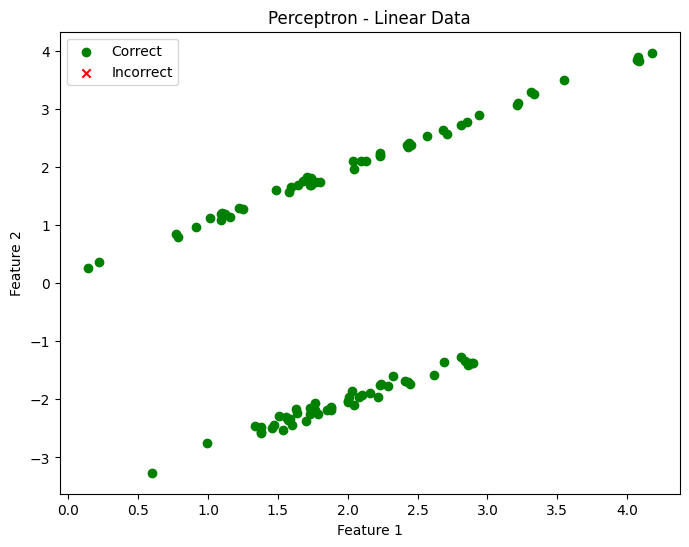

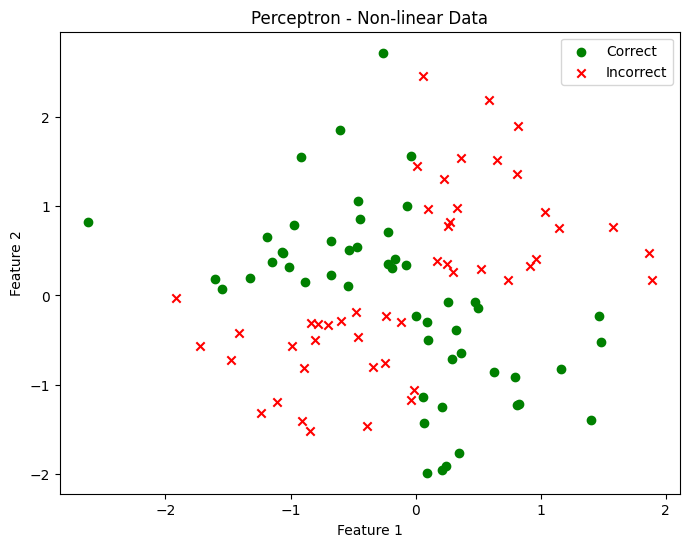

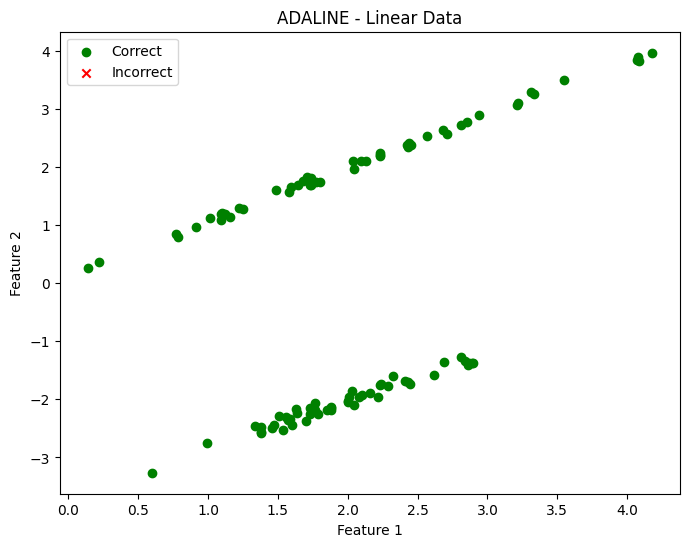

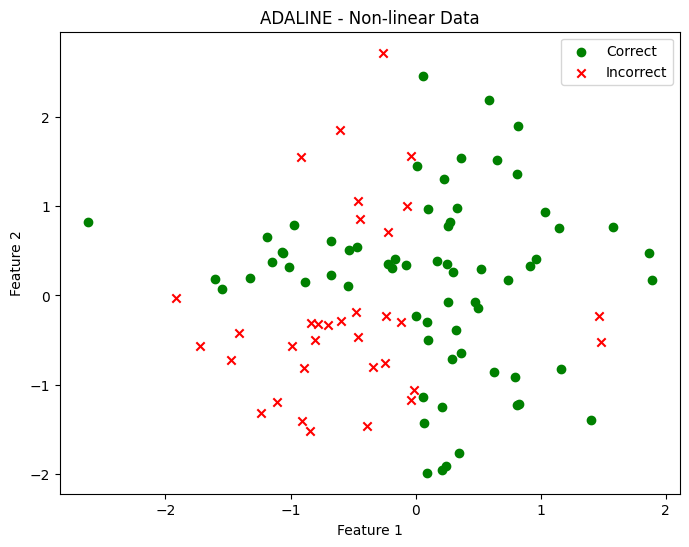

In [ ]:
# Function to calculate accuracy
def calculate_accuracy(y_true, y_pred):
    return np.mean(y_true == y_pred) * 100

# Function to plot predictions with hits and misses
def plot_results(X, y_true, y_pred, title):
    plt.figure(figsize=(8, 6))
    correct = y_true == y_pred
    incorrect = ~correct

    # Plot correct predictions
    plt.scatter(X[correct][:, 0], X[correct][:, 1], color='green', marker='o', label='Correct')
    # Plot incorrect predictions
    plt.scatter(X[incorrect][:, 0], X[incorrect][:, 1], color='red', marker='x', label='Incorrect')

    plt.title(title)
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.legend()
    plt.show()

# Load the datasets
linear_data = pd.read_csv('/content/linear_data.csv')
nonlinear_data = pd.read_csv('/content/nonlinear_data.csv')

# Prepare the data
X_linear = linear_data[['Feature 1', 'Feature 2']].values
y_linear = linear_data['Class'].values

X_nonlinear = nonlinear_data[['Feature 1', 'Feature 2']].values
y_nonlinear = nonlinear_data['Class'].values

# Train and evaluate Perceptron on linear data
perceptron = Perceptron()
perceptron.fit(X_linear, y_linear)
perceptron_predictions = perceptron.predict(X_linear)
plot_results(X_linear, y_linear, perceptron_predictions, "Perceptron - Linear Data")

# Train and evaluate Perceptron on non-linear data
perceptron.fit(X_nonlinear, y_nonlinear)
perceptron_predictions_nonlinear = perceptron.predict(X_nonlinear)
plot_results(X_nonlinear, y_nonlinear, perceptron_predictions_nonlinear, "Perceptron - Non-linear Data")

# Train and evaluate ADALINE on linear data
adaline = Adaline()
adaline.fit(X_linear, y_linear)
adaline_predictions = adaline.predict(X_linear)
plot_results(X_linear, y_linear, adaline_predictions, "ADALINE - Linear Data")

# Train and evaluate ADALINE on non-linear data
adaline.fit(X_nonlinear, y_nonlinear)
adaline_predictions_nonlinear = adaline.predict(X_nonlinear)
plot_results(X_nonlinear, y_nonlinear, adaline_predictions_nonlinear, "ADALINE - Non-linear Data")
